In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/heart.csv")  # Change path if needed
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [5]:
#missing value
df.loc[df.sample(frac=0.05).index, 'cholesterol'] = np.nan

# Fill missing values with median
df['cholesterol'].fillna(df['cholesterol'].median(), inplace=True)


/tmp/ipython-input-5-2336933729.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cholesterol'].fillna(df['cholesterol'].median(), inplace=True)


In [8]:
# Label encoding or one-hot
df = pd.get_dummies(df, drop_first=True)
df.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,cholesterol,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,NaN,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,NaN,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,NaN,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,NaN,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,NaN,True,False,True,False,True,False,False,False,True


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[num_cols] = scaler.fit_transform(df[num_cols])


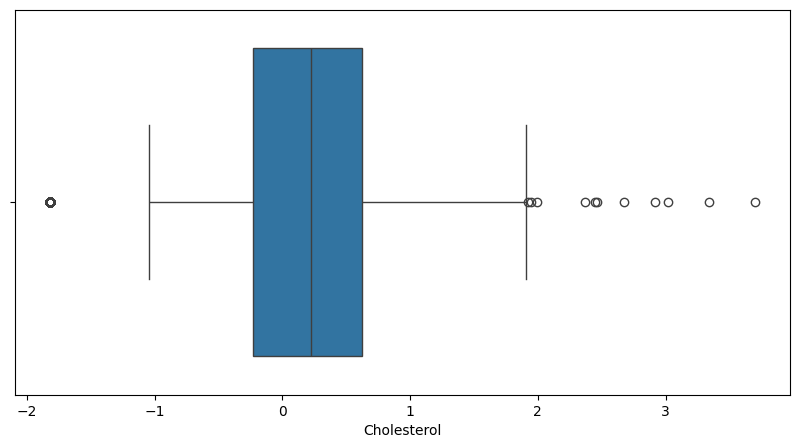

In [10]:
# Boxplot example
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Cholesterol'])

# Remove outliers using IQR
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Cholesterol'] < (Q1 - 1.5 * IQR)) | (df['Cholesterol'] > (Q3 + 1.5 * IQR)))]


In [11]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 917
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                735 non-null    float64
 1   RestingBP          735 non-null    float64
 2   Cholesterol        735 non-null    float64
 3   FastingBS          735 non-null    int64  
 4   MaxHR              735 non-null    float64
 5   Oldpeak            735 non-null    float64
 6   HeartDisease       735 non-null    int64  
 7   cholesterol        0 non-null      float64
 8   Sex_M              735 non-null    bool   
 9   ChestPainType_ATA  735 non-null    bool   
 10  ChestPainType_NAP  735 non-null    bool   
 11  ChestPainType_TA   735 non-null    bool   
 12  RestingECG_Normal  735 non-null    bool   
 13  RestingECG_ST      735 non-null    bool   
 14  ExerciseAngina_Y   735 non-null    bool   
 15  ST_Slope_Flat      735 non-null    bool   
 16  ST_Slope_Up        735 non-null